# [Tutorial: WSBIM2122 Chapter 05](https://uclouvain-cbio.github.io/WSBIM2122/sec-rnaseq.html)

**Set environment**

In [1]:
source("config_sing.R")
fun_suppress(library("tidyverse"))
fun_suppress(library("DESeq2"))

## Import data

In [2]:
### load the count matrix and the sample metadata
fpath = file.path(FD_RES, "wsbim2122_data/deseq2/counts.rda")
load(fpath)
fpath = file.path(FD_RES, "wsbim2122_data/deseq2/coldata.rda")
load(fpath)

**Check data**

In [3]:
coldata

,Cell,Type,Condition
,<chr>,<chr>,<chr>
sample1,Cell1,Epithelial,mock
sample2,Cell1,Epithelial,mock
sample3,Cell1,Epithelial,mock
sample4,Cell1,Epithelial,KD
sample5,Cell1,Epithelial,KD
sample6,Cell1,Epithelial,KD


In [4]:
head(counts)

,sample1,sample2,sample3,sample4,sample5,sample6
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000223972,0,0,0,0,0,1
ENSG00000227232,14,28,17,40,16,13
ENSG00000278267,8,4,3,1,1,6
ENSG00000243485,0,0,0,0,0,0
ENSG00000284332,0,0,0,0,0,0
ENSG00000237613,0,0,0,0,0,0


In [5]:
dim(counts)

[1] 58735     6

## Create DESeqDataSet

In [6]:
dds = DESeqDataSetFromMatrix(
    countData = counts,
    colData   = coldata,
    design    = ~Condition)

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


In [7]:
dds

class: DESeqDataSet 
dim: 58735 6 
metadata(1): version
assays(1): counts
rownames(58735): ENSG00000223972 ENSG00000227232 ... ENSG00000277475
  ENSG00000268674
rowData names(0):
colnames(6): sample1 sample2 ... sample5 sample6
colData names(3): Cell Type Condition

**Access the count data from the dds object**

In [17]:
x = counts(dds)

print(class(x))
print(type(x))
cat("++++++++++++++++++++++++++++++++++\n")
print(head(x))

[1] "matrix" "array" 
[1] "integer"
++++++++++++++++++++++++++++++++++
                sample1 sample2 sample3 sample4 sample5 sample6
ENSG00000223972       0       0       0       0       0       1
ENSG00000227232      14      28      17      40      16      13
ENSG00000278267       8       4       3       1       1       6
ENSG00000243485       0       0       0       0       0       0
ENSG00000284332       0       0       0       0       0       0
ENSG00000237613       0       0       0       0       0       0


In [27]:
x = assay(dds)

print(class(x))
print(type(x))
cat("++++++++++++++++++++++++++++++++++\n")
print(head(x))

[1] "matrix" "array" 
[1] "integer"
++++++++++++++++++++++++++++++++++
                sample1 sample2 sample3 sample4 sample5 sample6
ENSG00000223972       0       0       0       0       0       1
ENSG00000227232      14      28      17      40      16      13
ENSG00000278267       8       4       3       1       1       6
ENSG00000243485       0       0       0       0       0       0
ENSG00000284332       0       0       0       0       0       0
ENSG00000237613       0       0       0       0       0       0


**Plot the counts distributions of each sample**

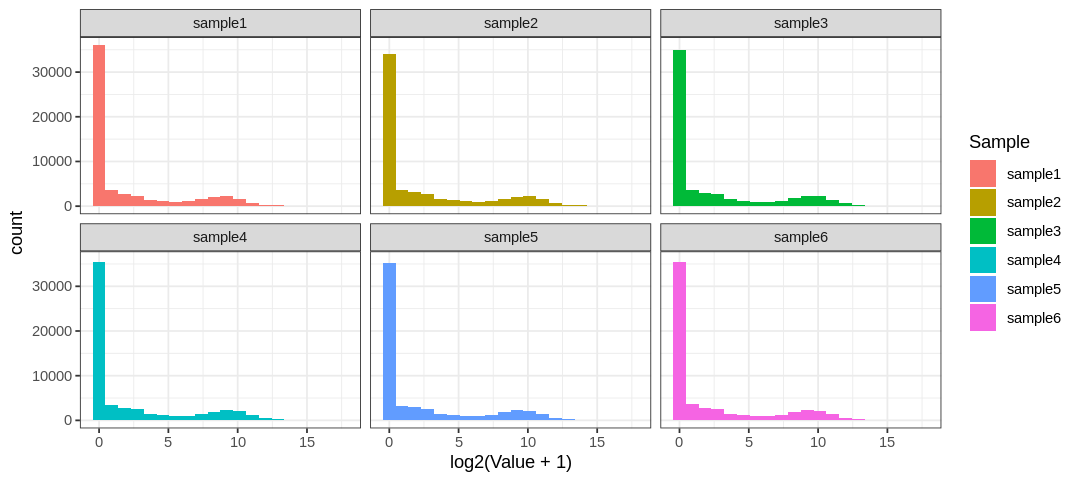

In [32]:
x = counts(dds)
x = data.frame(x) %>% gather(Sample, Value)

gpt = ggplot(x, aes(x=log2(Value+1), fill=Sample)) + 
    geom_histogram(bins=20) + 
    facet_wrap(~Sample) +
    theme_bw()

options(repr.plot.width=9, repr.plot.height=4)
print(gpt)

## Run DESeq2

In [33]:
dds = DESeq(dds)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



## PCA

- [plotPCA: Sample PCA plot for transformed data](https://www.rdocumentation.org/packages/DESeq2/versions/1.12.3/topics/plotPCA)
- [Analyzing RNA-seq data with DESeq2](http://bioconductor.org/packages/devel/bioc/vignettes/DESeq2/inst/doc/DESeq2.html)

**Using plotPCA**

In [41]:
showMethods("plotPCA")

Function: plotPCA (package BiocGenerics)
object="DESeqTransform"



In [46]:
dst = DESeqTransform(dds)
#vsd = vst(dds, blind=FALSE)
#rld = rlog(dds, blind=FALSE)
dst

class: DESeqTransform 
dim: 58735 6 
metadata(1): version
assays(4): counts mu H cooks
rownames(58735): ENSG00000223972 ENSG00000227232 ... ENSG00000277475
  ENSG00000268674
rowData names(22): baseMean baseVar ... deviance maxCooks
colnames(6): sample1 sample2 ... sample5 sample6
colData names(4): Cell Type Condition sizeFactor

In [52]:
all(assay(dst) == assay(dds))

[1] TRUE

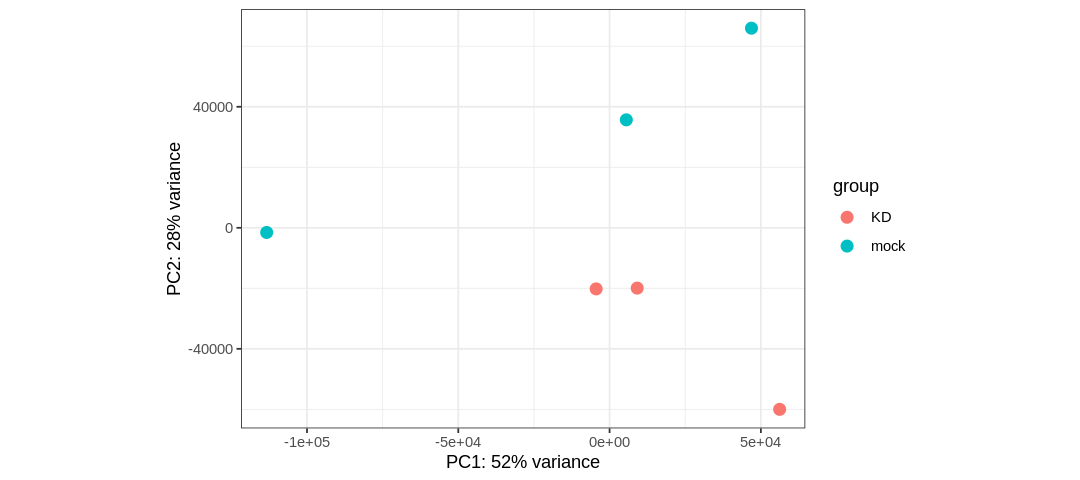

In [75]:
options(repr.plot.width=9, repr.plot.height=4)
plotPCA(dst, intgroup=c("Condition")) + theme_bw()

**Manual**

In [103]:
#cnt = counts(dds, normalized=TRUE)
cnt = counts(dds)

res = prcomp(cnt, center = TRUE, scale. = FALSE)
res

Standard deviations (1, .., p=6):
[1] 4609.49843  459.77499  329.97703  189.50952  102.34381   57.73399

Rotation (n x k) = (6 x 6):
              PC1         PC2           PC3        PC4         PC5         PC6
sample1 0.3045478  0.07038075 -0.5205791743  0.4210127 -0.65013489 -0.17710844
sample2 0.4545490  0.62990272 -0.0784945554 -0.5330027  0.08460945 -0.31495348
sample3 0.4160018  0.34200379  0.0004236134  0.4767143  0.38220701  0.58020429
sample4 0.4513590 -0.62954081 -0.4656206813 -0.2555653  0.34171484  0.03268209
sample5 0.3950594 -0.19959318  0.4648703434 -0.3169555 -0.53594848  0.44753167
sample6 0.4096113 -0.21246988  0.5384502702  0.3816089  0.14168224 -0.57571449

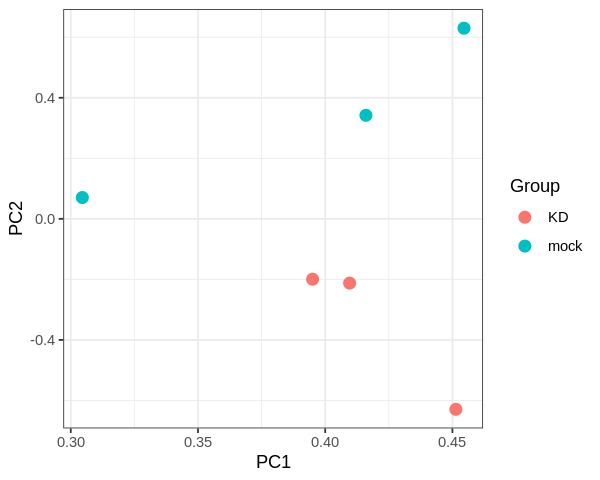

In [106]:
dat = data.frame(res$rotation)
dat$Group = coldata$Condition

gpt = ggplot(dat, aes(x=PC1, y=PC2, color=Group)) + 
    geom_point(size=3) + 
    theme_bw()

options(repr.plot.width=5, repr.plot.height=4)
print(gpt)

**Solution**

In [107]:
rld = rlogTransformation(dds)

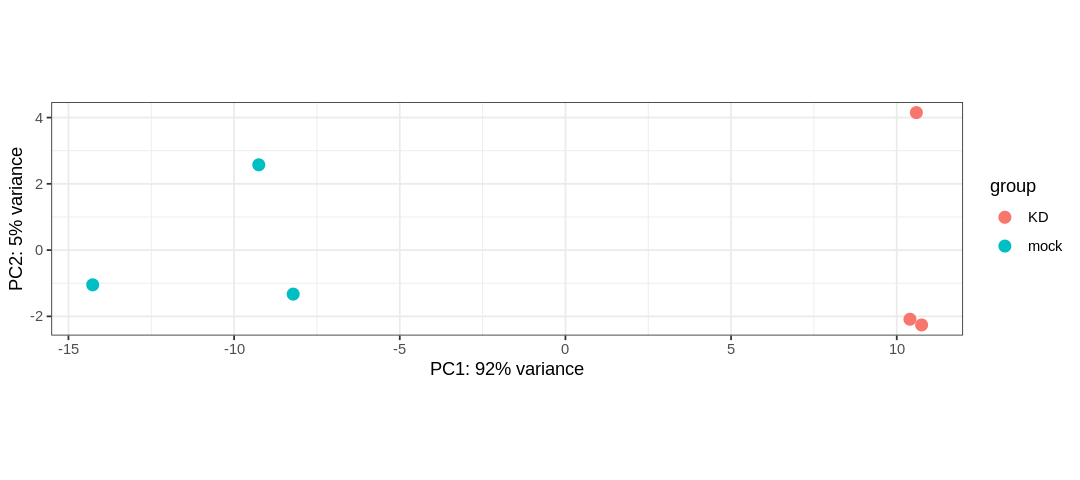

In [116]:
options(repr.plot.width=9, repr.plot.height=4)
plotPCA(rld, intgroup = "Condition") + theme_bw()

In [117]:
pca_data <- plotPCA(rld, intgroup = "Condition", returnData = TRUE)
pca_data

,PC1,PC2,group,Condition,name
,<dbl>,<dbl>,<fct>,<fct>,<chr>
sample1,-9.255547,2.574003,mock,mock,sample1
sample2,-14.268017,-1.047978,mock,mock,sample2
sample3,-8.216937,-1.328574,mock,mock,sample3
sample4,10.591838,4.149401,KD,KD,sample4
sample5,10.398083,-2.087520,KD,KD,sample5
sample6,10.750579,-2.259333,KD,KD,sample6


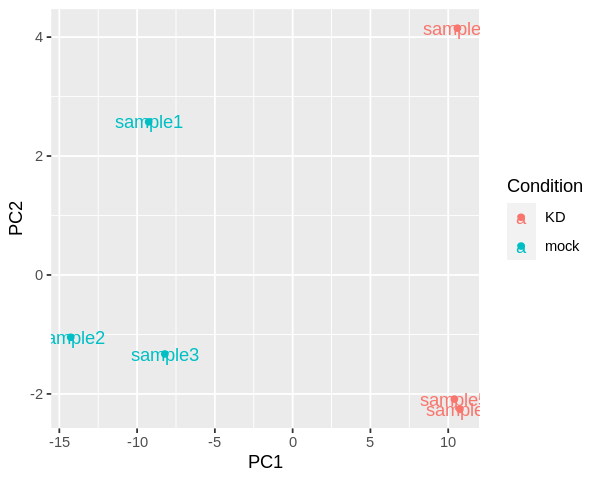

In [121]:
gpt = ggplot(pca_data, aes(x = PC1, y = PC2, color = Condition, label = name)) +
  geom_point() +
  geom_text()

options(repr.plot.width=5, repr.plot.height=4)
print(gpt)

## Inspecting size factors

In [123]:
print(sizeFactors(dds))

  sample1   sample2   sample3   sample4   sample5   sample6 
0.7268826 1.3086639 1.0773676 0.9660247 1.0421106 1.0126638 


**Manual**

In [172]:
### init
cnt = counts(dds)

### calculate Pseudo-reference
fun  = function(x){exp(mean(log(x)))}
pcnt = apply(cnt, 1, fun)

### skipping the genes with genometric mean of zero
idx = which(pcnt != 0)
cnt  = cnt[idx,]
pcnt = pcnt[idx]

### calculate size factors
fun  = function(x){median(x/pcnt, na.rm = TRUE)}
size = apply(cnt, 2, fun)

### show results
print(size)

  sample1   sample2   sample3   sample4   sample5   sample6 
0.7268826 1.3086639 1.0773676 0.9660247 1.0421106 1.0126638 


**Normalize count**

In [237]:
fun = function(x){x/size}
cnt = counts(dds)
mat = apply(cnt, 1, fun)
mat = t(mat)
head(mat)

,sample1,sample2,sample3,sample4,sample5,sample6
ENSG00000223972,0.00000,0.000000,0.000000,0.00000,0.000000,0.9874946
ENSG00000227232,19.26033,21.395868,15.779201,41.40681,15.353457,12.8374296
ENSG00000278267,11.00590,3.056553,2.784565,1.03517,0.959591,5.9249675
ENSG00000243485,0.00000,0.000000,0.000000,0.00000,0.000000,0.0000000
ENSG00000284332,0.00000,0.000000,0.000000,0.00000,0.000000,0.0000000
ENSG00000237613,0.00000,0.000000,0.000000,0.00000,0.000000,0.0000000


In [238]:
cnt = counts(dds, normalize=TRUE)
head(cnt)

,sample1,sample2,sample3,sample4,sample5,sample6
ENSG00000223972,0.00000,0.000000,0.000000,0.00000,0.000000,0.9874946
ENSG00000227232,19.26033,21.395868,15.779201,41.40681,15.353457,12.8374296
ENSG00000278267,11.00590,3.056553,2.784565,1.03517,0.959591,5.9249675
ENSG00000243485,0.00000,0.000000,0.000000,0.00000,0.000000,0.0000000
ENSG00000284332,0.00000,0.000000,0.000000,0.00000,0.000000,0.0000000
ENSG00000237613,0.00000,0.000000,0.000000,0.00000,0.000000,0.0000000


In [243]:
all((mat - cnt) < 10^(-10))

[1] TRUE

**Compare Size Factors to sequencing depth.**

In [174]:
cnt = counts(dds)
lib = apply(cnt, 2, sum)

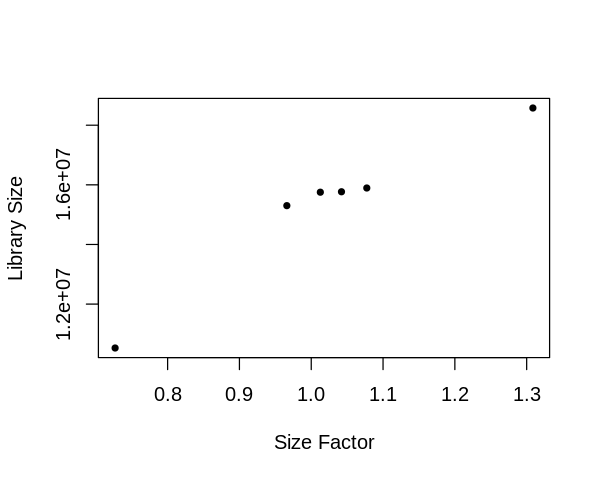

In [177]:
options(repr.plot.width=5, repr.plot.height=4)
plot(size, lib, pch=20, xlab = "Size Factor", ylab = "Library Size")

## Dispersion plot

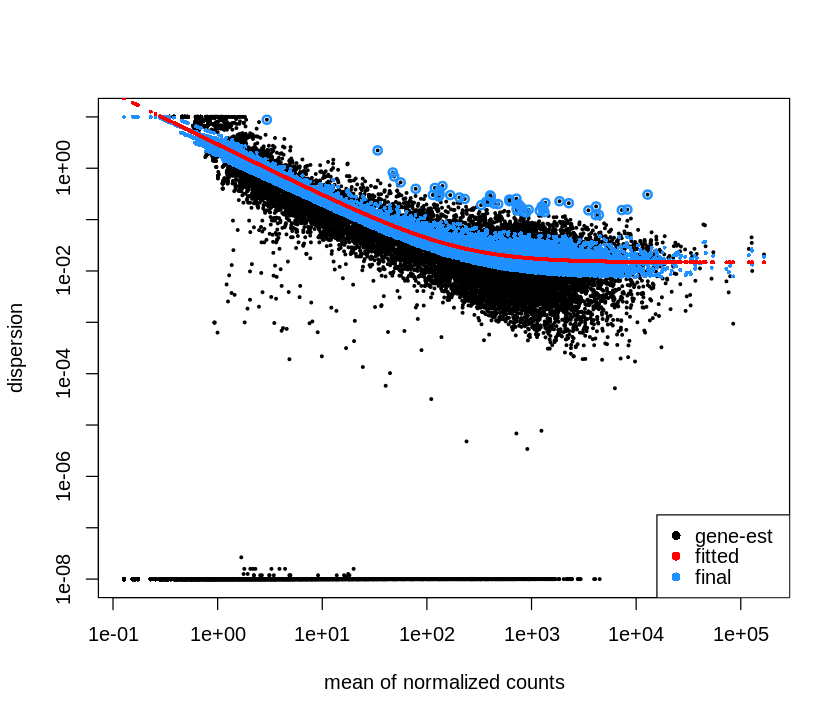

In [182]:
options(repr.plot.width=7, repr.plot.height=6)
plotDispEsts(dds)

## DESeq2 results

[log2FoldChange calculation in DESeq2 output](https://support.bioconductor.org/p/77021/#77022)

In [183]:
resultsNames(dds)

[1] "Intercept"            "Condition_mock_vs_KD"

In [184]:
dds$Condition

[1] mock mock mock KD   KD   KD  
Levels: KD mock

In [185]:
dds$Condition <- relevel(dds$Condition, ref = "mock")
dds <- DESeq(dds)
resultsNames(dds)

using pre-existing size factors

estimating dispersions

found already estimated dispersions, replacing these

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



[1] "Intercept"            "Condition_KD_vs_mock"

In [187]:
res = results(dds, name = "Condition_KD_vs_mock")
res_tbl = as_tibble(res, rownames = "ENSEMBL")
head(res_tbl)

ENSEMBL,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000223972,0.1645824,0.9642948,4.0804729,0.2363194,0.8131849,NA
ENSG00000227232,21.0055160,0.2959775,0.5398165,0.5482928,0.5834909,0.7405315
ENSG00000278267,4.1277918,-1.0352320,1.1421509,-0.9063882,0.3647304,0.5557903
ENSG00000243485,0.0000000,NA,NA,NA,NA,NA
ENSG00000284332,0.0000000,NA,NA,NA,NA,NA
ENSG00000237613,0.0000000,NA,NA,NA,NA,NA


In [245]:
dds_no_prior = DESeq(dds, betaPrior=FALSE)

using pre-existing size factors

estimating dispersions

found already estimated dispersions, replacing these

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [246]:
res_np     = results(dds_no_prior, name = "Condition_KD_vs_mock")
res_np_tbl = as_tibble(res, rownames = "ENSEMBL")
head(res_np_tbl)

ENSEMBL,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000223972,0.1645824,0.9642948,4.0804729,0.2363194,0.8131849,NA
ENSG00000227232,21.0055160,0.2959775,0.5398165,0.5482928,0.5834909,0.7405315
ENSG00000278267,4.1277918,-1.0352320,1.1421509,-0.9063882,0.3647304,0.5557903
ENSG00000243485,0.0000000,NA,NA,NA,NA,NA
ENSG00000284332,0.0000000,NA,NA,NA,NA,NA
ENSG00000237613,0.0000000,NA,NA,NA,NA,NA


**Manual | BaseMean**

In [192]:
cnt = counts(dds, normalize=TRUE)
head(cnt)

,sample1,sample2,sample3,sample4,sample5,sample6
ENSG00000223972,0.00000,0.000000,0.000000,0.00000,0.000000,0.9874946
ENSG00000227232,19.26033,21.395868,15.779201,41.40681,15.353457,12.8374296
ENSG00000278267,11.00590,3.056553,2.784565,1.03517,0.959591,5.9249675
ENSG00000243485,0.00000,0.000000,0.000000,0.00000,0.000000,0.0000000
ENSG00000284332,0.00000,0.000000,0.000000,0.00000,0.000000,0.0000000
ENSG00000237613,0.00000,0.000000,0.000000,0.00000,0.000000,0.0000000


In [191]:
cnt = counts(dds, normalize=TRUE)
x   = apply(cnt, 1, mean)

print(head(x))
cat("+++++++++++++++++++++++++\n")
print(all(x == res_tbl$baseMean))

ENSG00000223972 ENSG00000227232 ENSG00000278267 ENSG00000243485 ENSG00000284332 
      0.1645824      21.0055160       4.1277918       0.0000000       0.0000000 
ENSG00000237613 
      0.0000000 
+++++++++++++++++++++++++
[1] TRUE


**Manual | Log2FC**

- [How does DESeq2 handle zero counts in one condition?](https://support.bioconductor.org/p/64014/#64016)

calculate the Log2FC of non-zero counts

In [230]:
### init
cnt = counts(dds, normalize=TRUE)

### calculate Pseudo-reference
fun  = function(x){exp(mean(log(x)))}
pcnt = apply(cnt, 1, fun)

### get the genes with no zero
idx = which(pcnt != 0)
cnt = cnt[idx,]

### calculate log2FC
fun = function(x){median(log2(x[4:6])) - median(log2(x[1:3]))}
lg2fc = apply(cnt, 1, fun)

In [226]:
head(counts(dds, normalize=FALSE))

,sample1,sample2,sample3,sample4,sample5,sample6
ENSG00000223972,0,0,0,0,0,1
ENSG00000227232,14,28,17,40,16,13
ENSG00000278267,8,4,3,1,1,6
ENSG00000243485,0,0,0,0,0,0
ENSG00000284332,0,0,0,0,0,0
ENSG00000237613,0,0,0,0,0,0


In [225]:
head(counts(dds, normalize=TRUE))

,sample1,sample2,sample3,sample4,sample5,sample6
ENSG00000223972,0.00000,0.000000,0.000000,0.00000,0.000000,0.9874946
ENSG00000227232,19.26033,21.395868,15.779201,41.40681,15.353457,12.8374296
ENSG00000278267,11.00590,3.056553,2.784565,1.03517,0.959591,5.9249675
ENSG00000243485,0.00000,0.000000,0.000000,0.00000,0.000000,0.0000000
ENSG00000284332,0.00000,0.000000,0.000000,0.00000,0.000000,0.0000000
ENSG00000237613,0.00000,0.000000,0.000000,0.00000,0.000000,0.0000000


In [231]:
print(head(lg2fc))

ENSG00000227232 ENSG00000278267 ENSG00000233750 ENSG00000268903 ENSG00000269981 
     -0.3270692      -1.5620374      -0.6300607      -1.5369512      -0.7319624 
ENSG00000279457 
      0.1480139 


In [229]:
dat = res_tbl[idx,]
head(dat)

ENSEMBL,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000227232,21.005516,0.29597748,0.5398165,0.5482928,0.58349088,0.7405315
ENSG00000278267,4.127792,-1.03523202,1.1421509,-0.9063882,0.36473044,0.5557903
ENSG00000233750,10.212787,-0.51943355,0.7024934,-0.7394142,0.45965554,0.6433337
ENSG00000268903,19.416360,-0.63024257,0.6058769,-1.0402156,0.29823973,0.4901969
ENSG00000269981,18.100110,-1.18718159,0.5607867,-2.1169930,0.03426044,0.1042930
ENSG00000279457,44.425914,0.06298354,0.3338448,0.1886611,0.85035841,0.9192674


In [196]:
cnt = counts(dds, normalize=TRUE)

set.seed(123)
mat = data.frame(cnt) %>% sample_n(5)
mat

,sample1,sample2,sample3,sample4,sample5,sample6
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000259003,0,0.000000,0,1.03517,0.000000,0
ENSG00000270618,0,0.000000,0,0.00000,0.000000,0
ENSG00000258983,0,3.820691,0,1.03517,0.959591,0
ENSG00000206912,0,0.000000,0,0.00000,0.000000,0
ENSG00000227737,0,0.000000,0,0.00000,0.000000,0


In [148]:
print(length(pcnt))

[1] 58735


In [149]:
dim(cnt)

[1] 58735     6

In [150]:
head(cnt)

,sample1,sample2,sample3,sample4,sample5,sample6
ENSG00000223972,0,0,0,0,0,1
ENSG00000227232,14,28,17,40,16,13
ENSG00000278267,8,4,3,1,1,6
ENSG00000243485,0,0,0,0,0,0
ENSG00000284332,0,0,0,0,0,0
ENSG00000237613,0,0,0,0,0,0


In [161]:
idx = c(
    "ENSG00000021355", 
    "ENSG00000048140", 
    "ENSG00000087302", 
    "ENSG00000117419", 
    "ENSG00000127129", 
    "ENSG00000176101" 
)

In [162]:
cnt[idx,]

,sample1,sample2,sample3,sample4,sample5,sample6
ENSG00000021355,807,1240,1080,1182,1004,883
ENSG00000048140,1267,2093,1816,1552,1794,1717
ENSG00000087302,1434,2467,1902,2159,1811,1672
ENSG00000117419,1098,1776,1429,1561,1383,1263
ENSG00000127129,0,0,0,7,14,13
ENSG00000176101,1091,1762,1371,1652,1213,1261


In [164]:
fun  = function(x){exp(mean(log(x)))}
mat  = cnt[idx,]
pcnt = apply(mat, 1, fun)
print(pcnt)

ENSG00000021355 ENSG00000048140 ENSG00000087302 ENSG00000117419 ENSG00000127129 
       1020.952        1686.648        1878.838        1402.117           0.000 
ENSG00000176101 
       1371.647 


In [157]:
which(rownames(cnt) == "ENSG00000021355")

[1] 17803

In [165]:
fun  = function(x){x/pcnt}
apply(mat, 2, fun)

,sample1,sample2,sample3,sample4,sample5,sample6
ENSG00000021355,0.7904391,1.214553,1.0578367,1.1577434,0.9833963,0.8648794
ENSG00000048140,0.7511943,1.240923,1.0766920,0.9201685,1.0636484,1.0179957
ENSG00000087302,0.7632377,1.313046,1.0123278,1.1491144,0.9638936,0.8899117
ENSG00000117419,0.7831014,1.266656,1.0191730,1.1133163,0.9863655,0.9007806
ENSG00000127129,NaN,NaN,NaN,Inf,Inf,Inf
ENSG00000176101,0.7953942,1.284587,0.9995283,1.2043916,0.8843384,0.9193328


In [166]:
pcnt

ENSG00000021355 ENSG00000048140 ENSG00000087302 ENSG00000117419 ENSG00000127129 
       1020.952        1686.648        1878.838        1402.117           0.000 
ENSG00000176101 
       1371.647

In [169]:
print(which(pcnt != 0))

ENSG00000021355 ENSG00000048140 ENSG00000087302 ENSG00000117419 ENSG00000176101 
              1               2               3               4               6 
